## Loading the dataset 



In [19]:
import pandas as pd 
import numpy as np

beans_df = pd.read_csv("beans.csv")

### Producing a table of summary statistics and identifying outliers

           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
count   13533.0    13533.0          13533.0          13533.0      13533.0   
mean    53057.0      855.0            320.0            202.0          2.0   
std     29401.0      215.0             86.0             45.0          0.0   
min     20420.0      525.0            184.0            123.0          1.0   
25%     36269.0      703.0            253.0            176.0          1.0   
50%     44581.0      794.0            296.0            193.0          2.0   
75%     61422.0      977.0            376.0            217.0          2.0   
max    254616.0     1985.0            739.0            460.0          2.0   

       Eccentricity  ConvexArea  EquivDiameter   Extent  Solidity  roundness  \
count       13533.0     13533.0        13533.0  13533.0   13533.0    13533.0   
mean            1.0     53777.0          253.0      1.0       1.0        1.0   
std             0.0     29853.0           59.0      0.0       0.0 

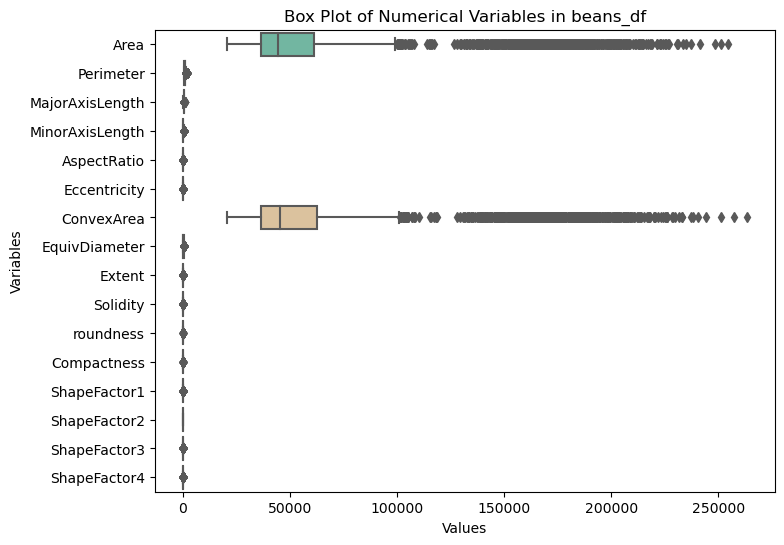

In [20]:
summary_statistics = beans_df.describe().round()
print(summary_statistics)

numerical_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', \
                     'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter',\
                     'Extent', 'Solidity', 'roundness', 'Compactness',\
                     'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', \
                     'ShapeFactor4']


import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

sns.boxplot(data=beans_df[numerical_columns], orient='h', palette='Set2')
plt.title('Box Plot of Numerical Variables in beans_df')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

The ranges for Eccentricity, Extent, Solidity, roundness, Compactness  ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, and AspectRatio are between 0 and 1. Area and convex area have a similar range in the thousands (~2k to 260k). Perimeter is bewteen 855 and 1985. And MajorAxisLength, MajorAxisLength and EquivDiameter have a similar range (~200 to ~540-740). The highest range belongs to Area and Convex area. 

According to the box plot there are about three outilers for Area and four outliers for ConvexArea. In the other hand, I am not very familiar with the dimensions of beans, but I believe that the 0 in the roundness as a min might be an outlier becasue a bean has to have some proportion of roundness


### Generating a plot showing the correlations between the numerical data in the data set

/local_scratch/21444710/ipykernel_695/515382857.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = beans_df.corr()


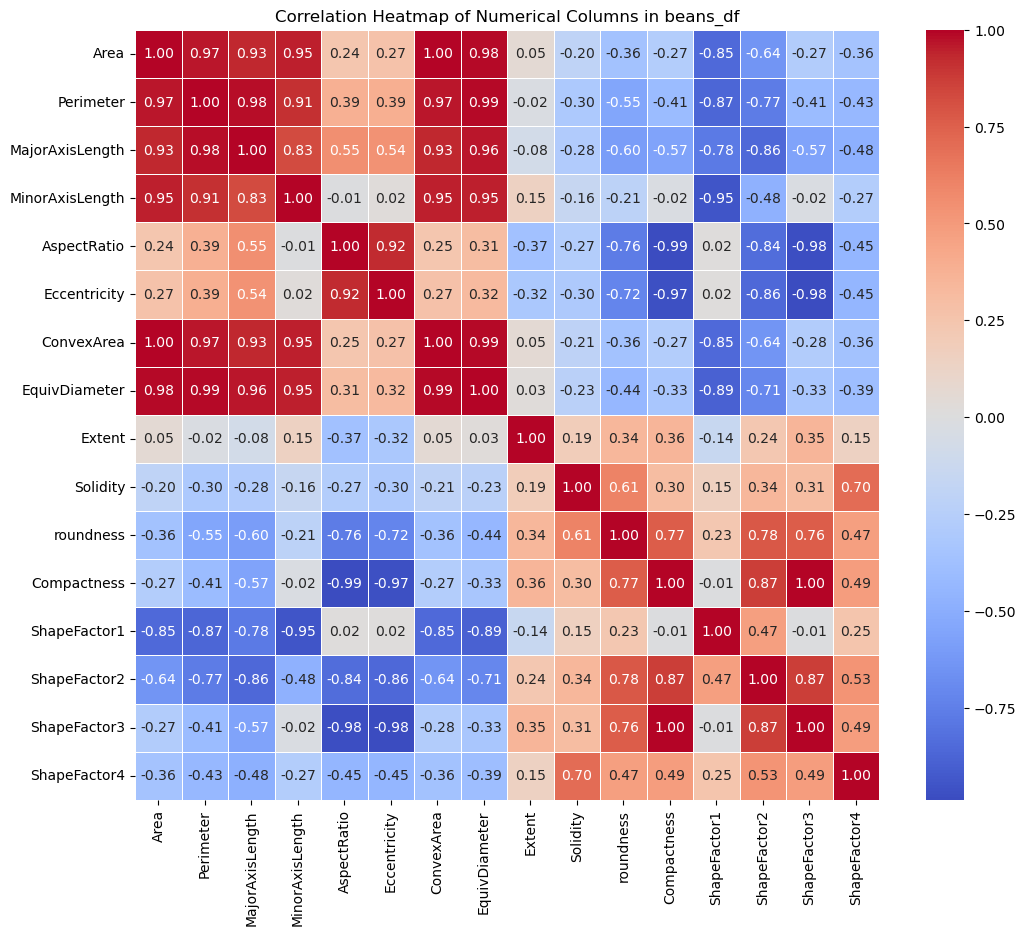

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = beans_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Columns in beans_df")
plt.show()


### Performing Feature Engineering 

Based on the heatmap above I decided to included the features of Area, Perimeter, MajorAxisLength, MinorAxislegth, ConvexArea, EquivDiameter, roundness, compactness, ShapeFactor1, ShapeFactor2. Such feautres are the the ones that had a high (>0.70) correlation coefficient with other 6 features or more. 

In [5]:
 beans_df["Class"].unique() #checking to choose the encode of this var later 

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
selected_columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',\
                    'ConvexArea', 'EquivDiameter', 'roundness', 'Compactness',\ 
                    'ShapeFactor1', 'ShapeFactor2', 'Class']

new_dataset = beans_df[selected_columns].copy()
numerical_features = new_dataset.drop('Class', axis=1)

from sklearn.preprocessing import StandardScaler, LabelEncoder

#standarizing the selected features 
scaler = StandardScaler()
numerical_features_standardized = scaler.fit_transform(numerical_features)

new_dataset[numerical_features.columns] = numerical_features_standardized

#encoding the class variable for the model later 
label_encoder = LabelEncoder()
new_dataset['Class'] = label_encoder.fit_transform(new_dataset['Class'])

In [7]:
new_dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,roundness,Compactness,ShapeFactor1,ShapeFactor2,Class
0,-0.838853,-1.139688,-1.301921,-0.632217,-0.839544,-1.060495,1.420254,1.838075,0.681965,2.397588,5
1,-0.827322,-1.010590,-1.391089,-0.435922,-0.824236,-1.041419,0.225234,2.496844,0.369690,3.096544,5
2,-0.805349,-1.075346,-1.247768,-0.586894,-0.806883,-1.005376,1.248936,1.763526,0.604443,2.230451,5
3,-0.783989,-0.973965,-1.274194,-0.440757,-0.772246,-0.970716,0.509755,2.081575,0.403382,2.510528,5
4,-0.779499,-1.093859,-1.375674,-0.268494,-0.782530,-0.963477,1.872214,2.767726,0.120426,3.266690,5
...,...,...,...,...,...,...,...,...,...,...,...
13528,-0.372800,-0.444050,-0.363522,-0.364682,-0.377499,-0.363044,0.722972,0.024688,0.263333,0.050257,3
13529,-0.372664,-0.454280,-0.446770,-0.258866,-0.377968,-0.362858,0.814075,0.356275,0.112555,0.279822,3
13530,-0.371372,-0.445796,-0.447195,-0.248329,-0.375456,-0.361097,0.753624,0.364042,0.106452,0.283912,3
13531,-0.371100,-0.425040,-0.425726,-0.268572,-0.372173,-0.360727,0.576583,0.278291,0.144024,0.223061,3


### Partitioning the beans data set so that a random sample of 80% of the data will be used for training and 20% will be used for testing your machine learning model.

In [8]:
from sklearn.model_selection import train_test_split

X = new_dataset.drop('Class', axis=1)
y = new_dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


### Using the scikit-learn library to generate a random forest machine learning model for classifying the 7 types of beans based on the chosen features from the data set 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

### Using the test data set to generate a final validation for the model and generating a multi-class confusion matrix for the test data to demonstrate the accuracy of the model

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.91


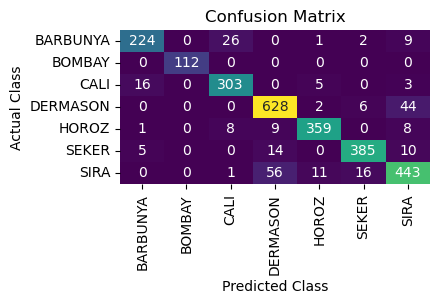

[[224   0  26   0   1   2   9]
 [  0 112   0   0   0   0   0]
 [ 16   0 303   0   5   0   3]
 [  0   0   0 628   2   6  44]
 [  1   0   8   9 359   0   8]
 [  5   0   0  14   0 385  10]
 [  0   0   1  56  11  16 443]]
Baseline Accuracy: 0.2320


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=label_encoder.classes_, 
                              columns=label_encoder.classes_)

#plotting the confusion matrix using seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_df, annot=True, cmap='viridis', fmt='g', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

print(conf_matrix)

#calculating the baseline accuracy to then judge the accuracy of the model 
majority_class_count = np.max(np.diag(conf_matrix))  #count of the majority class
total_instances = np.sum(conf_matrix)  #total number of observations

baseline_accuracy = majority_class_count / total_instances
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")


Considering that the baseline accuracy (hypothetical accuracy if all the observations were predicted to be the largest class (Dermason) in the dataset) is 0.23, our model is way better, with a 0.91 of accuracy. This means that 91% of the classes from our test dataset were correctly predicted. Thus, the accuracy of our random forest model is very good!

### Classifying the beans in the unlabeled dataset using the model 

In [12]:
unlabeled_df = pd.read_csv('beans-unknown.csv') 

selected_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',\
                     'ConvexArea', 'EquivDiameter', 'roundness', 'Compactness', \
                     'ShapeFactor1', 'ShapeFactor2']

unlabeled_data = unlabeled_df[selected_features].copy()

numerical_features_standardized = scaler.transform(unlabeled_data)

unlabeled_data[selected_features] = numerical_features_standardized

predictions = rf_model.predict(unlabeled_data[selected_features])

predicted_classes = label_encoder.inverse_transform(predictions)

print("Predicted Classes for Unlabeled Beans:")
for i, predicted_class in enumerate(predicted_classes):
    print(f"Bean {i+1}: {predicted_class}")

Predicted Classes for Unlabeled Beans:
Bean 1: DERMASON
Bean 2: DERMASON
Bean 3: DERMASON
Bean 4: DERMASON
Bean 5: SIRA
